In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Lol Frames2"

path = "/content/drive/MyDrive/Lol Frames2"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Lol Frames2


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

# Ruta a la carpeta que contiene las subcarpetas de campeones
data_dir = path

# Definir parámetros
batch_size = 32
img_height = 150
img_width = 150
epochs =30
# Definir el número de clases (número de campeones)
num_classes = 5  # Reemplaza esto con el número correcto de clases


In [ ]:
# Crear un generador de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalizar valores de píxeles
    validation_split=0.2  # Dividir datos en entrenamiento y validación
)


In [ ]:
# Crear conjuntos de datos de entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1463 images belonging to 5 classes.
Found 362 images belonging to 5 classes.


In [ ]:
# Crear un modelo ResNet50 preentrenado
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base (ResNet)
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/30
46/46 [==============================] - 405s 9s/step - loss: 1.6346 - accuracy: 0.2235 - val_loss: 1.5832 - val_accuracy: 0.2376
Epoch 2/30
46/46 [==============================] - 182s 4s/step - loss: 1.5802 - accuracy: 0.2529 - val_loss: 1.5567 - val_accuracy: 0.3812
Epoch 3/30
46/46 [==============================] - 191s 4s/step - loss: 1.5265 - accuracy: 0.3267 - val_loss: 1.6428 - val_accuracy: 0.1796
Epoch 4/30
46/46 [==============================] - 182s 4s/step - loss: 1.5485 - accuracy: 0.3001 - val_loss: 1.5188 - val_accuracy: 0.2376
Epoch 5/30
46/46 [==============================] - 184s 4s/step - loss: 1.4766 - accuracy: 0.4197 - val_loss: 1.5120 - val_accuracy: 0.2956
Epoch 6/30
46/46 [==============================] - 182s 4s/step - loss: 1.4550 - accuracy: 0.4293 - val_loss: 1.4698 - val_accuracy: 0.3398
Epoch 7/30
45/46 [============================>.] - ETA: 3s - loss: 1.3917 - accuracy: 0.4465

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
# Guardar el modelo entrenado
model.save('lol_champion_classifier4 03/11/23.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


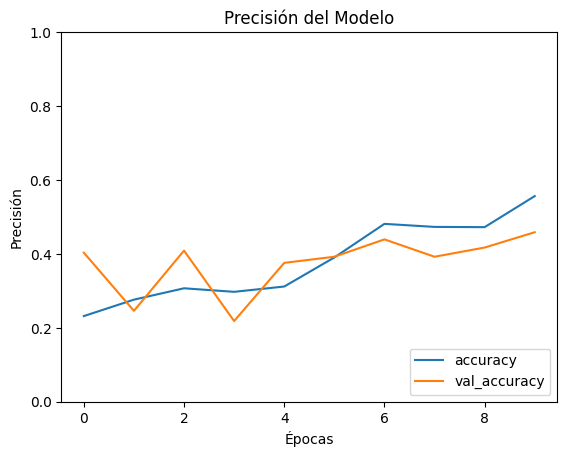

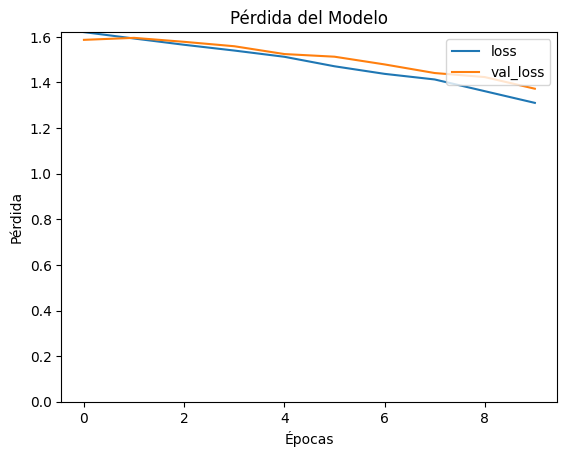

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Precisión del Modelo')
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.legend(loc='upper right')
plt.title('Pérdida del Modelo')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Genera predicciones para el conjunto de validación
predictions = model.predict(validation_generator)

# Convierte las predicciones a etiquetas de clase (usando argmax)
predicted_classes = predictions.argmax(axis=1)

# Obtiene las etiquetas verdaderas del generador de validación
true_classes = validation_generator.classes

# Calcula la matriz de confusión
confusion = confusion_matrix(true_classes, predicted_classes)

# Imprime la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Calcula el accuracy por clase
accuracy_per_class = confusion.diagonal() / confusion.sum(axis=1)

# Imprime el accuracy por clase
print("Accuracy por clase:")
for i, class_name in enumerate(validation_generator.class_indices):
    print(f"{class_name}: {accuracy_per_class[i]}")

# Imprime un informe de clasificación detallado
print("\nInforme de clasificación:")
print(classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices))


12/12 [==============================] - 33s 3s/step
Matriz de confusión:
[[60 10  1  0 10]
 [40 10  1  0 14]
 [63 15  1  0  7]
 [39 10  1  0  4]
 [58 12  0  0  6]]
Accuracy por clase:
aatrox: 0.7407407407407407
ahri: 0.15384615384615385
akali: 0.011627906976744186
akshan: 0.0
alistar: 0.07894736842105263

Informe de clasificación:
              precision    recall  f1-score   support

      aatrox       0.23      0.74      0.35        81
        ahri       0.18      0.15      0.16        65
       akali       0.25      0.01      0.02        86
      akshan       0.00      0.00      0.00        54
     alistar       0.15      0.08      0.10        76

    accuracy                           0.21       362
   macro avg       0.16      0.20      0.13       362
weighted avg       0.17      0.21      0.13       362



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!ls


aatrox	ahri  akali  akshan  alistar  lol_champion_classifier2.h5  lol_champion_classifier.h5


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Cargar el modelo entrenado
model = tf.keras.models.load_model('lol_champion_classifier3.h5')

# Lista de nombres de campeones
champion_names = ['atroxx', 'ahir', 'akali', 'akshan','alistar' ]  # Agrega el nombre de tus campeones aquí en el mismo orden que se usó para el entrenamiento

# Cargar una imagen para probar (reemplaza 'imagen_a_probar.jpg' con la ruta de tu imagen)
img_path = '/content/aatroxturn.jpg'
#img_path = '/content/ability_0103_W1.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normaliza la imagen

# Realizar una predicción
predictions = model.predict(img_array)

# Obtener la clase predicha
predicted_class_index = np.argmax(predictions)
predicted_champion = champion_names[predicted_class_index]

print(f"El campeón predicho es: {predicted_champion}")

1/1 [==============================] - 1s 1s/step
El campeón predicho es: akali
